# Linear Regression Assignment: Parcel Delivery Time Estimation

This notebook contains the complete workflow for predicting parcel delivery time using Linear Regression.

#By Sanjana

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv("/porter_data_1.csv")

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (175777, 14)


market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [17]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

In [18]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# Target variable
df['delivery_time_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

# Drop NaNs
df = df.dropna()

# Remove outliers
Q1 = df['delivery_time_minutes'].quantile(0.25)
Q3 = df['delivery_time_minutes'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['delivery_time_minutes'] >= Q1 - 1.5*IQR) & (df['delivery_time_minutes'] <= Q3 + 1.5*IQR)]

print("Data shape after cleaning:", df.shape)

Data shape after cleaning: (174028, 15)


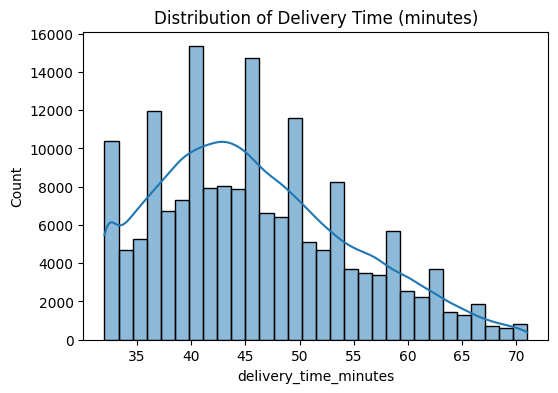

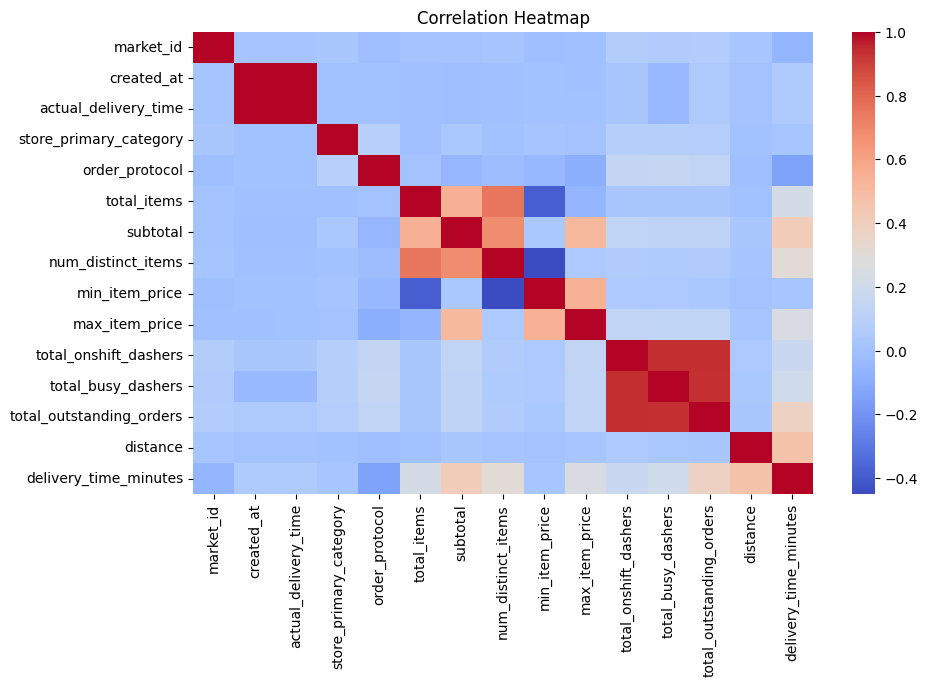

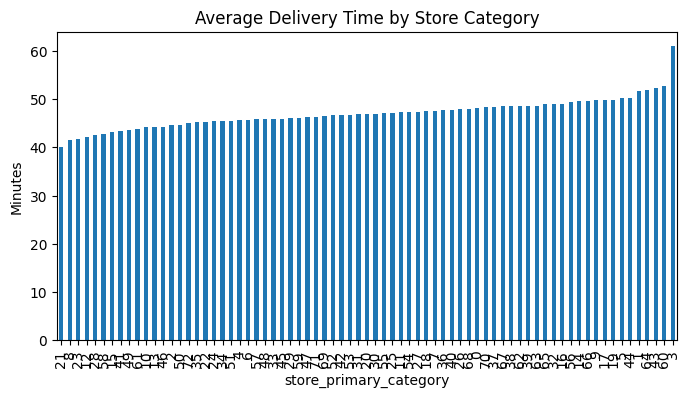

In [19]:
plt.figure(figsize=(6,4))
sns.histplot(df['delivery_time_minutes'], kde=True, bins=30)
plt.title("Distribution of Delivery Time (minutes)")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

if 'store_primary_category' in df.columns:
    plt.figure(figsize=(8,4))
    df.groupby('store_primary_category')['delivery_time_minutes'].mean().sort_values().plot(kind='bar')
    plt.title("Average Delivery Time by Store Category")
    plt.ylabel("Minutes")
    plt.show()

In [20]:
X = df.drop(columns=['actual_delivery_time', 'created_at', 'delivery_time_minutes'])
X = pd.get_dummies(X, drop_first=True)
y = df['delivery_time_minutes']

print("Feature shape:", X.shape)

Feature shape: (174028, 12)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 3.61
R² Score: 0.8320


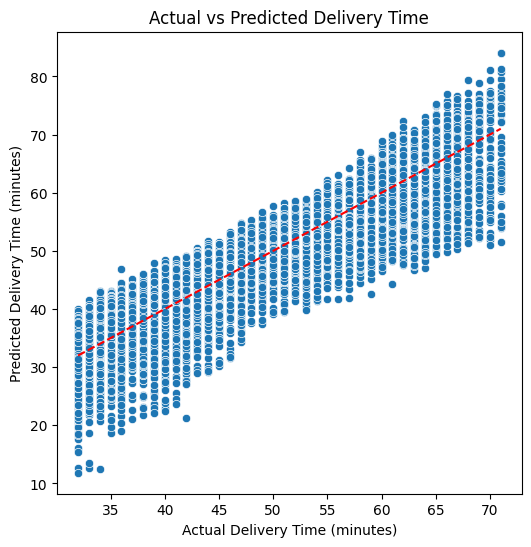

In [13]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Delivery Time (minutes)")
plt.ylabel("Predicted Delivery Time (minutes)")
plt.title("Actual vs Predicted Delivery Time")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

                     Feature  Coefficient
5         num_distinct_items     0.667129
11                  distance     0.470286
10  total_outstanding_orders     0.345182
1     store_primary_category     0.005141
4                   subtotal     0.001266
7             max_item_price     0.000992
6             min_item_price     0.000215
3                total_items    -0.039885
9         total_busy_dashers    -0.139862
8      total_onshift_dashers    -0.335287
0                  market_id    -0.579065
2             order_protocol    -0.757613


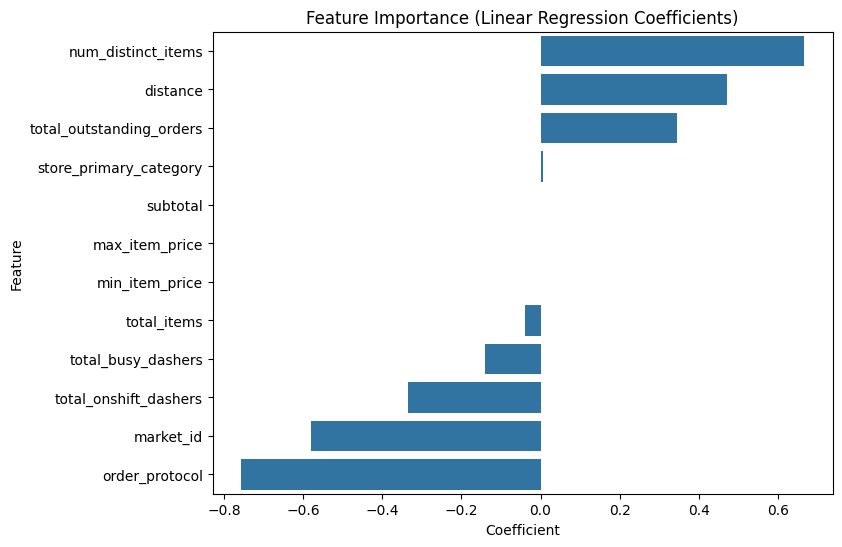

In [24]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)

plt.figure(figsize=(8,6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

In [ ]:
print("\nKey Insights:")
print("- RMSE shows the average error in minutes between predictions and actual times.")
print("- Features with higher coefficients have more influence on delivery time.")
print("- R² indicates how much variance is explained by the model.")
print("- Accuracy can be improved with additional features like weather, traffic, or day of week.")